In [1]:
import tonic
import tonic.transforms as transforms
import pandas as pd
import os
import numpy as np

from data_loader import SamplesDataLoader

root_dir = "/Users/jost/Downloads/SPADES"

/opt/anaconda3/envs/NeuroTUM/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
transform_queue = transforms.Compose([
    transforms.MergePolarities(),
    transforms.CenterCrop(sensor_size=(1280,720,1), size = (720,720)),
    transforms.Downsample(spatial_factor=240/720),
    transforms.ToTimesurface(dt=333,tau=200,sensor_size=(240,240,1))
])

data_loader = SamplesDataLoader(root_dir = root_dir, dataset_type="synthetic", transform = transform_queue)
sample_events, sample_label = data_loader[0]

**Finally -- save pngs**

In [6]:
data_loader.save_sample(idx = 2,file_path = '/Users/jost/Jost/Code/2024-nc-hackathon-spades/frames')

**Visualize RGB imgs**

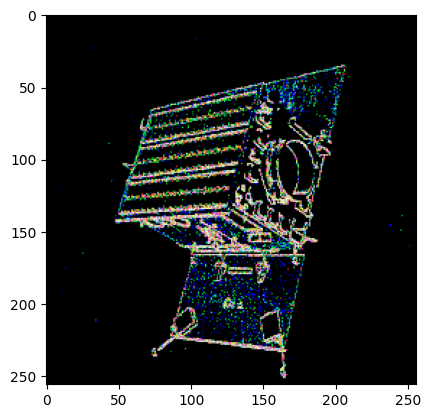

In [31]:
plt.imshow(rgb_frames[0])

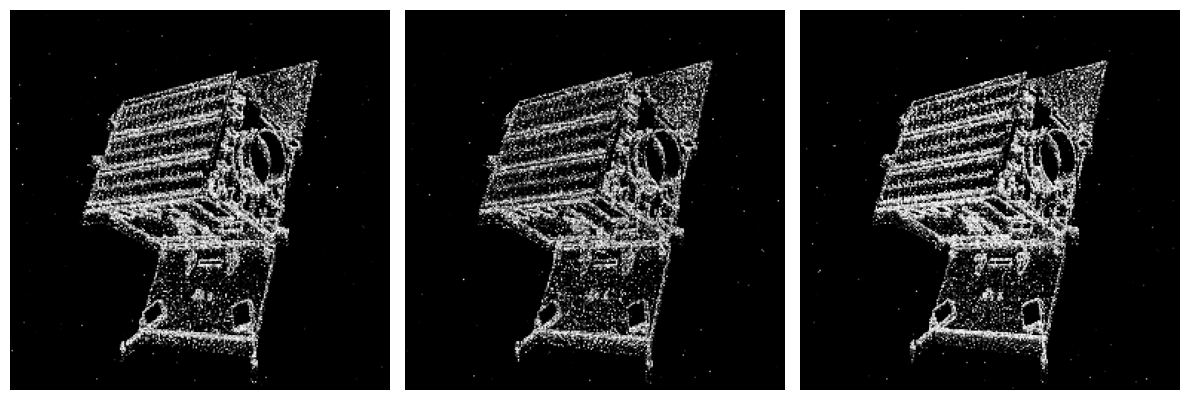

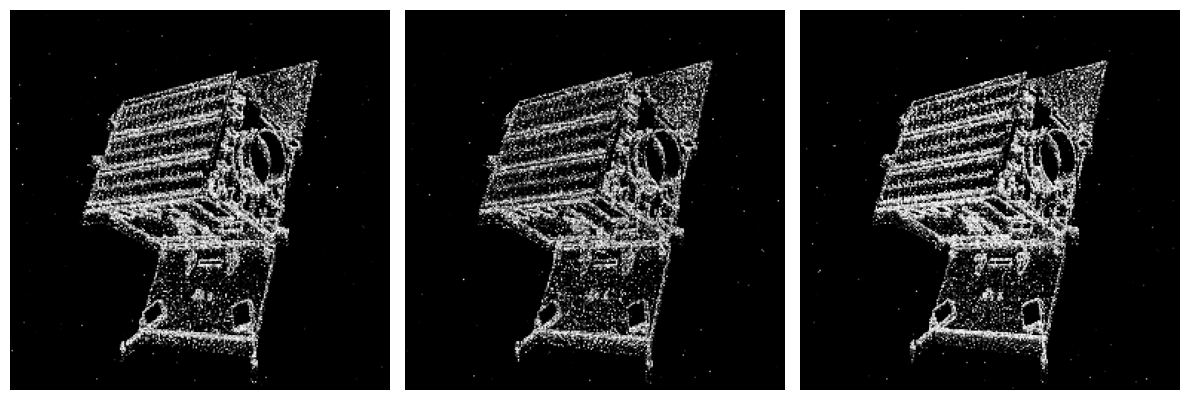

In [17]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def visualize_surfaces(surfaces):
    n_surfaces = surfaces.shape[0]
    fig, axs = plt.subplots(1, n_surfaces, figsize=(12, 8))
    
    for i in range(n_surfaces):
        # Extract the 256x256 image, squeezing out the channel dimension
        axs[i].imshow(surfaces[i, 0], cmap='gray')  # Use grayscale colormap for single-channel data
        axs[i].axis('off')
        
    plt.tight_layout()
    plt.show()

# Example usage with the first few samples, e.g., surfaces[40:43]
visualize_surfaces(sample_events[40:43])

visualize_surfaces(sample_events[40:43])